#Team Project "**Water points**"

Team:    
+ Petr Khovental    
+ Maryia Kalinina
+ Darya Volkova

**Motivation**:    
*By predicting the condition of water points based on available data, we can prevent potential problems and ensure the proper functioning of water supply systems. For example, if we can predict that a particular water point is about to fail, we can take action in advance to prevent this. This may include carrying out preventative maintenance or replacing equipment before it fails. Predicting the condition of water points also helps water system operators make better decisions and optimise system performance.*

## 1. Preparation

In [ ]:
import sys
import pandas as pd
import numpy as np
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
from scipy import stats as st
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings('ignore')

In [ ]:
class DataScience:


    def missing_zero_values_table(self, df):
        zero_val = (df == 0.00).astype(int).sum(axis=0)
        mis_val = df.isnull().sum()
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        mz_table = pd.concat([zero_val, mis_val, mis_val_percent], axis=1)
        mz_table = mz_table.rename(
            columns={0: 'Zero Values', 1: 'Missing Values', 2: '% of Total Values'})
        mz_table['Total Zero Missing Values'] = mz_table['Zero Values'] + mz_table['Missing Values']
        mz_table['% Total Zero Missing Values'] = 100 * mz_table['Total Zero Missing Values'] / len(df)
        mz_table['Data Type'] = df.dtypes
        mz_table = mz_table[
            mz_table.iloc[:, 1] != 0].sort_values(
            '% of Total Values', ascending=False).round(1)
        print("Your selected dataframe has " + str(df.shape[1]) + " columns and " + str(df.shape[0]) + " Rows.\n"
                                                                                                       "There are " + str(
            mz_table.shape[0]) +
              " columns that have missing values.")

        return mz_table


    def sns_draw(self, data, parametr, bins=30):
        fig = plt.figure(figsize=(15, 6), dpi= 80)
        grid = plt.GridSpec(4, 4, hspace=0.5, wspace=0.2)
        ax_main = fig.add_subplot(grid[:-1, :-1])
        ax_right = fig.add_subplot(grid[:-1, -1])
        sns.distplot(data[parametr], ax=ax_main)
        sns.boxplot(data[parametr], ax=ax_right)
        ax_right.grid(axis='y')
        ax_main.set(title='График '+parametr)
        ax_main.axvline(np.mean(data[parametr]),color='g', linestyle='--', label='Среднее')
        ax_main.axvline(np.median(data[parametr]),color='g', linestyle='-', label='Медиана')
        ax_main.legend()
        fig.show()


    def plot_feature_importance(self,importance,names,model_type):

        feature_importance = np.array(importance)
        feature_names = np.array(names)

        #Create a DataFrame using a Dictionary
        data={'feature_names':feature_names,'feature_importance':feature_importance}
        fi_df = pd.DataFrame(data)

        #Sort the DataFrame in order decreasing feature importance
        fi_df.sort_values(by=['feature_importance'], ascending=False,inplace=True)

        #Define size of bar plot
        plt.figure(figsize=(10,8))
        #Plot Searborn bar chart
        sns.barplot(x=fi_df['feature_importance'], y=fi_df['feature_names'])
        #Add chart labels
        plt.title(model_type + 'FEATURE IMPORTANCE')
        plt.xlabel('FEATURE IMPORTANCE')
        plt.ylabel('FEATURE NAMES')

    def fit(self,train_features, train_actuals):
        for name in models.keys():
            est = models[name]
            est_params = params[name]
            gscv = GridSearchCV(estimator=est, param_grid=est_params, cv=5)
            gscv.fit(train_features, train_actuals)
            train_predictions = gscv.predict(features_train)
            predictions = gscv.predict(features_test)
            result_list.append({
            'model': name,
            'train_mae_score': mean_absolute_error(target_train, train_predictions),
            'test_mae_score': mean_absolute_error(target_test, predictions),
            'best_params': gscv.best_params_
            })


    def dataset_info(self,data):
        data.info()
        display(data.head(10))
        display(data.describe())
        print('Количество дубликатов:', data.duplicated().sum())



ds = DataScience()

## 2. Downloading of dataset

### Lets import our datasets.

In [ ]:
# df_test = pd.read_csv('/content/Test set values.csv')
df_train_l = pd.read_csv('/content/Training set labels.csv')
df_train_v =  pd.read_csv('/content/Training set values.csv')

In [ ]:
df_train_l.shape, df_train_v.shape

((59400, 2), (6196, 40))

In [ ]:
data = pd.merge(df_train_l, df_train_v, on="id", how="left")

## 3. Data analysys

### Посмотрим, данные

In [ ]:
data.shape

In [ ]:
# ds.dataset_info(df)

In [ ]:
data.index = data['id']
data.drop('id', axis=1, inplace=True)
data.sort_index(inplace=True)

data.head(5)

status_group  amount_tsh date_recorded funder  gps_height installer  \
id                                                                          
0   non functional         NaN           NaN    NaN         NaN       NaN   
1       functional         NaN           NaN    NaN         NaN       NaN   
2       functional         NaN           NaN    NaN         NaN       NaN   
3       functional         NaN           NaN    NaN         NaN       NaN   
4   non functional         0.0    2011-03-22   Cmsr         0.0      CMSR   

    longitude  latitude wpt_name  num_private  ... payment_type water_quality  \
id                                             ...                              
0         NaN       NaN      NaN          NaN  ...          NaN           NaN   
1         NaN       NaN      NaN          NaN  ...          NaN           NaN   
2         NaN       NaN      NaN          NaN  ...          NaN           NaN   
3         NaN       NaN      NaN          NaN  ...          NaN           NaN   
4   36.164893 -6.099289  Ezeleda          0.0  ...      unknown          soft   

   quality_group  quantity  quantity_group        source   source_type  \
id                                                                       
0            NaN       NaN             NaN           NaN           NaN   
1            NaN       NaN             NaN           NaN           NaN   
2            NaN       NaN             NaN           NaN           NaN   
3            NaN       NaN             NaN           NaN           NaN   
4           good       dry             dry  shallow well  shallow well   

    source_class waterpoint_type waterpoint_type_group  
id                                                      
0            NaN             NaN                   NaN  
1            NaN             NaN                   NaN  
2            NaN             NaN                   NaN  
3            NaN             NaN                   NaN  
4    groundwater       hand pump             hand pump  

[5 rows x 40 columns]

In [ ]:
data.describe()

amount_tsh   gps_height    longitude      latitude  num_private  \
count    6196.000000  6196.000000  6196.000000  6.196000e+03  6196.000000   
mean      314.913202   670.527598    34.159454 -5.764349e+00     0.508554   
std      2398.025910   696.307401     6.505054  2.962319e+00    10.503718   
min         0.000000   -54.000000     0.000000 -1.156451e+01     0.000000   
25%         0.000000     0.000000    33.151405 -8.669226e+00     0.000000   
50%         0.000000   366.500000    34.936932 -5.100046e+00     0.000000   
75%        25.000000  1320.250000    37.260058 -3.338983e+00     0.000000   
max    117000.000000  2623.000000    40.345193 -2.000000e-08   698.000000   

       region_code  district_code   population  construction_year  
count  6196.000000     6196.00000  6196.000000        6195.000000  
mean     15.661233        5.70949   178.671562        1303.485876  
std      18.244682        9.79314   431.622915         950.781739  
min       1.000000        0.00000     0.000000           0.000000  
25%       5.000000        2.00000     0.000000           0.000000  
50%      12.000000        3.00000    25.000000        1985.000000  
75%      17.000000        5.00000   210.000000        2004.000000  
max      99.000000       80.00000  7500.000000        2013.000000

In [ ]:
data.isnull().sum()

status_group                 0
amount_tsh               53204
date_recorded            53204
funder                   53585
gps_height               53204
installer                53589
longitude                53204
latitude                 53204
wpt_name                 53204
num_private              53204
basin                    53204
subvillage               53234
region                   53204
region_code              53204
district_code            53204
lga                      53204
ward                     53204
population               53204
public_meeting           53524
recorded_by              53204
scheme_management        53617
scheme_name              56153
permit                   53522
construction_year        53205
extraction_type          53205
extraction_type_group    53205
extraction_type_class    53205
management               53205
management_group         53205
payment                  53205
payment_type             53205
water_quality            53205
quality_

Let's delete all useless columns.

In [ ]:
to_del_features = ["date_recorded", "funder", "installer", "wpt_name", \
                   "longitude", "latitude","basin", "subvillage", "region", \
                   "region_code", "district_code", "lga", "ward", \
                   "public_meeting", "recorded_by", "scheme_management", \
                   "scheme_name", "management", "management_group", "permit"]

data.drop(columns= to_del_features, axis=1, inplace=True)
data.isnull().sum()

In [ ]:
data.dtypes

status_group              object
amount_tsh               float64
date_recorded             object
funder                    object
gps_height               float64
installer                 object
longitude                float64
latitude                 float64
wpt_name                  object
num_private              float64
basin                     object
subvillage                object
region                    object
region_code              float64
district_code            float64
lga                       object
ward                      object
population               float64
public_meeting            object
recorded_by               object
scheme_management         object
scheme_name               object
permit                    object
construction_year        float64
extraction_type           object
extraction_type_group     object
extraction_type_class     object
management                object
management_group          object
payment                   object
payment_ty

In [ ]:
# data.columns[data.isnull().any()].tolist()

## Удалим одну строку, где во всех столбцах значения Nan

In [ ]:
data[data.isna().any(axis=1)]

In [ ]:
data = data.drop(45640)

Lets check our data.

In [ ]:
data.isnull().sum()

status_group                 0
amount_tsh               53203
date_recorded            53203
funder                   53584
gps_height               53203
installer                53588
longitude                53203
latitude                 53203
wpt_name                 53203
num_private              53203
basin                    53203
subvillage               53233
region                   53203
region_code              53203
district_code            53203
lga                      53203
ward                     53203
population               53203
public_meeting           53523
recorded_by              53203
scheme_management        53616
scheme_name              56152
permit                   53521
construction_year        53204
extraction_type          53204
extraction_type_group    53204
extraction_type_class    53204
management               53204
management_group         53204
payment                  53204
payment_type             53204
water_quality            53204
quality_

In [ ]:
object_columns = data.select_dtypes(include='object')
num_columns = data.select_dtypes(include='float64')

KeyboardInterrupt: ignored

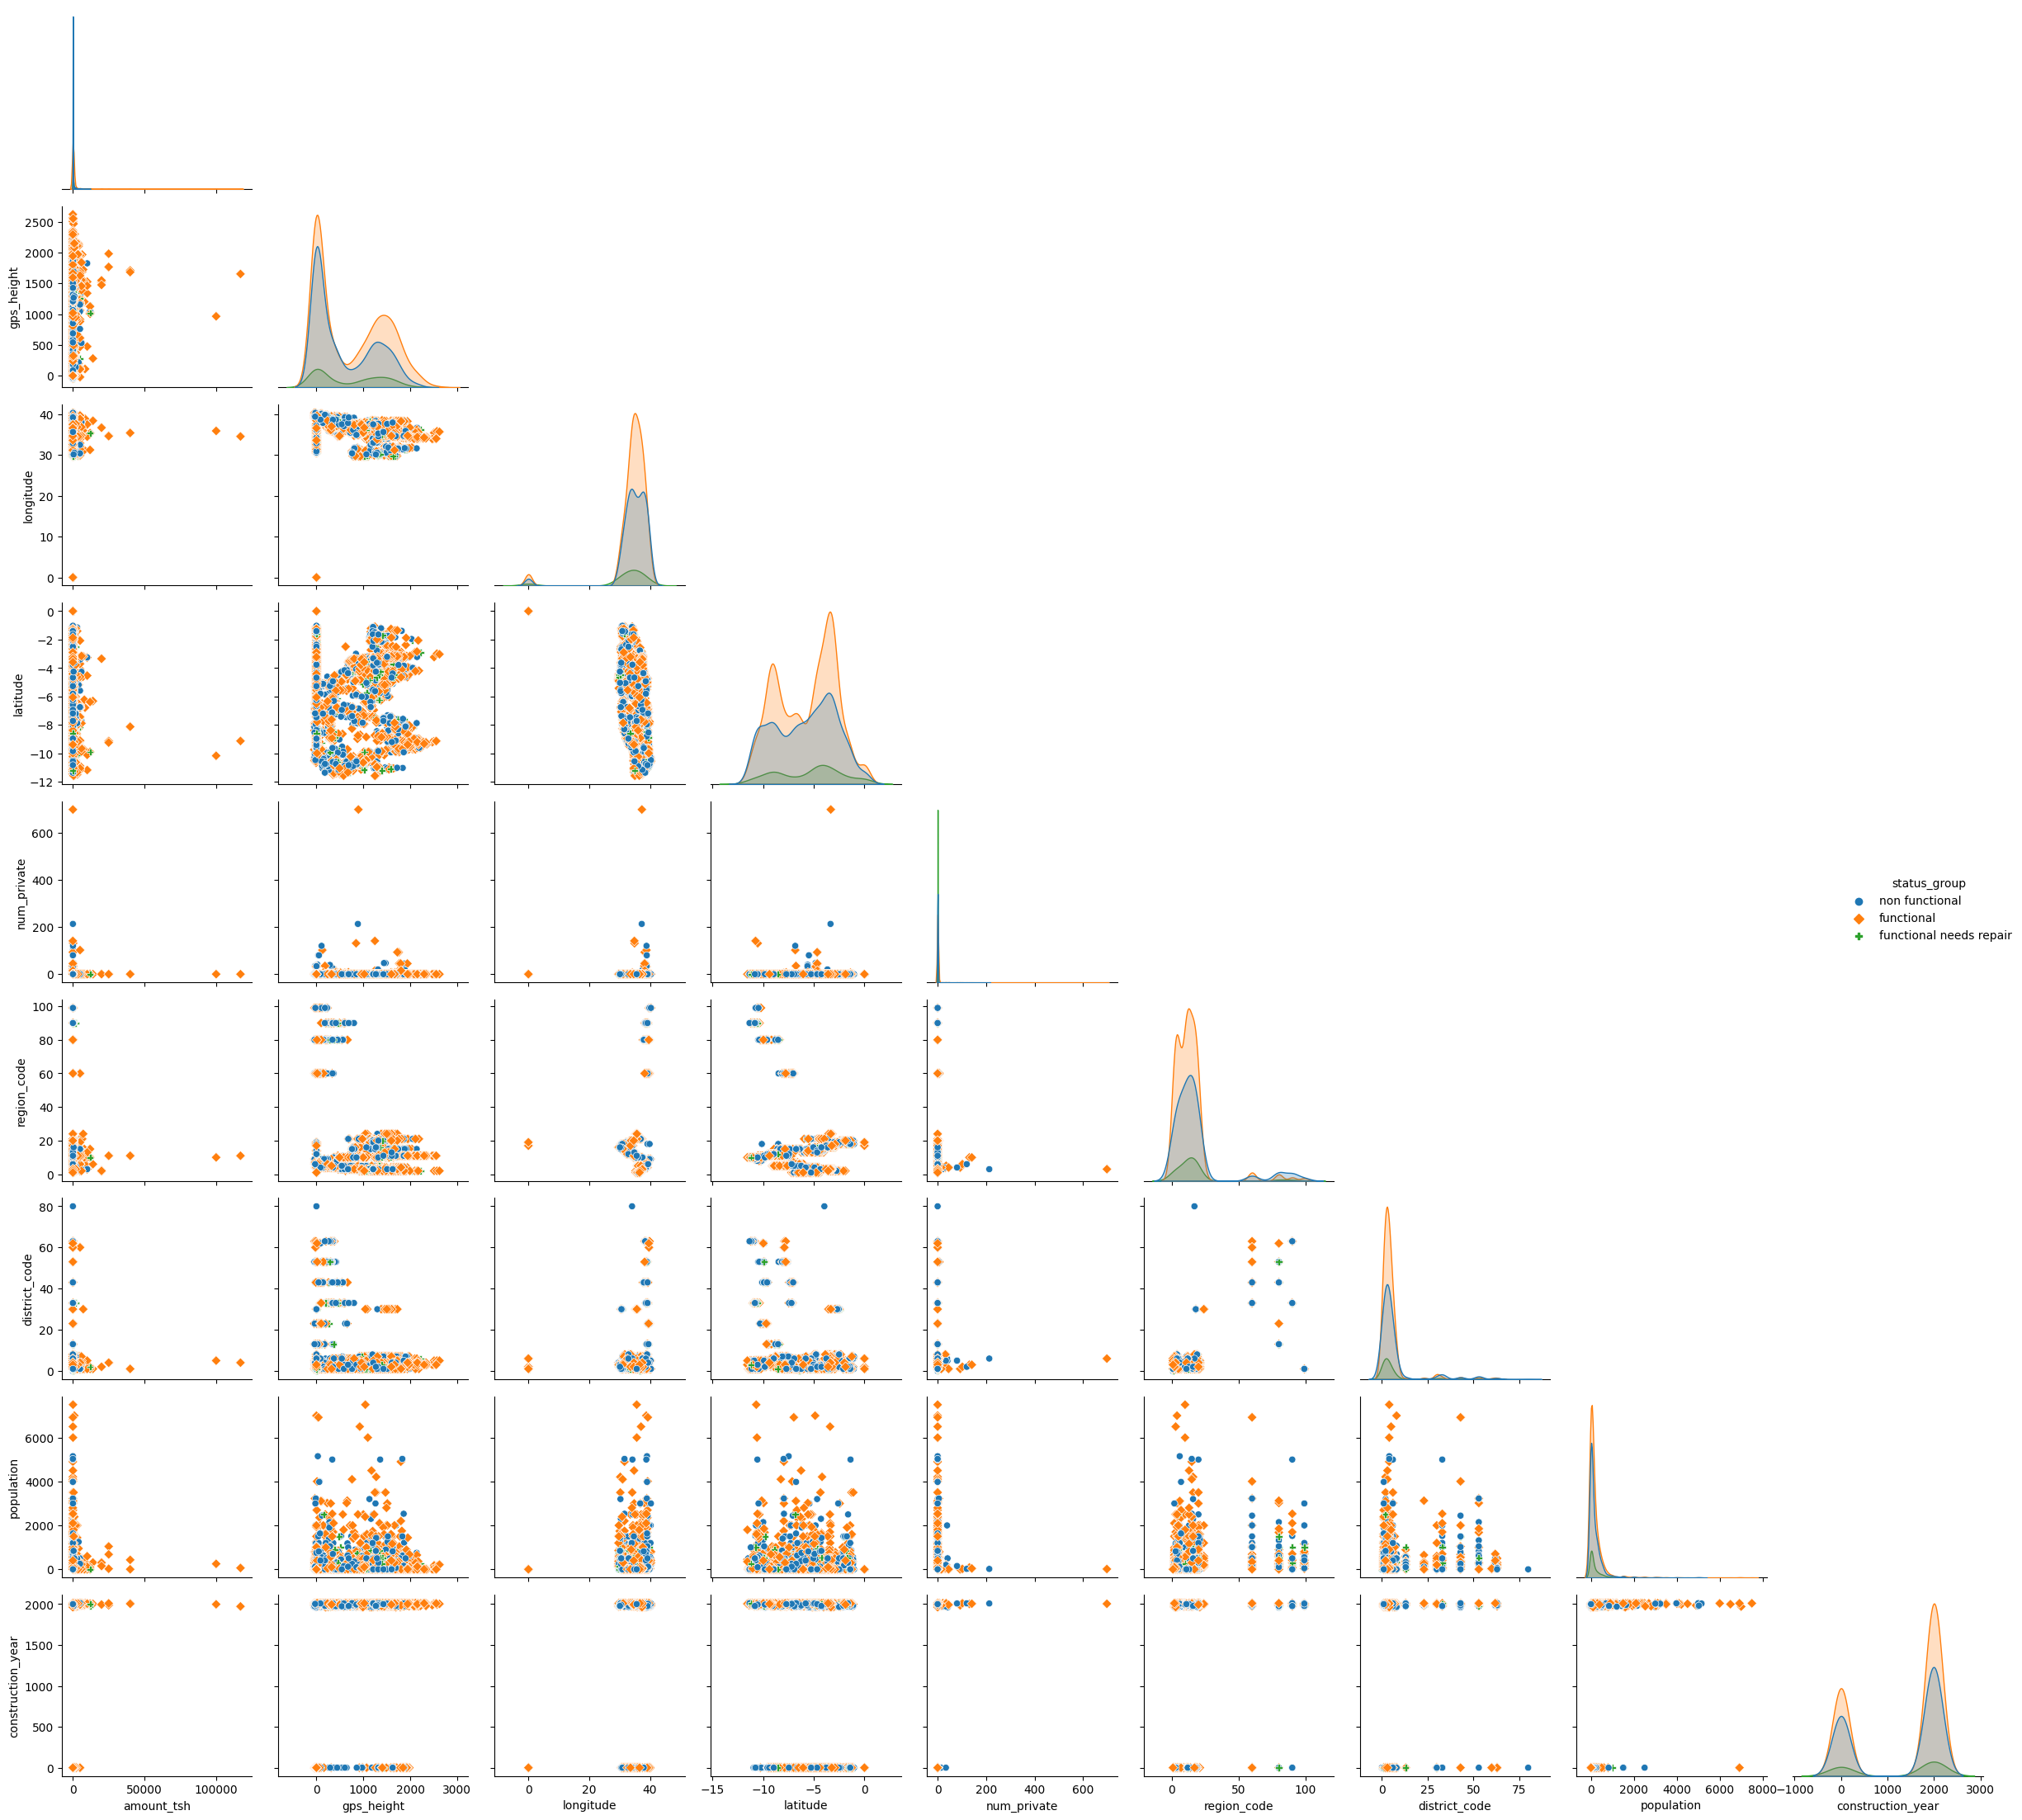

In [ ]:
sns.pairplot(data=num_columns.join(data["status_group"]), hue="status_group", markers=["o", "D", "P"], corner=True)

## Preprocessing for ML

In [ ]:
data.head(5)

status_group  amount_tsh date_recorded funder  gps_height installer  \
id                                                                          
0   non functional         NaN           NaN    NaN         NaN       NaN   
1       functional         NaN           NaN    NaN         NaN       NaN   
2       functional         NaN           NaN    NaN         NaN       NaN   
3       functional         NaN           NaN    NaN         NaN       NaN   
4   non functional         0.0    2011-03-22   Cmsr         0.0      CMSR   

    longitude  latitude wpt_name  num_private  ... payment_type water_quality  \
id                                             ...                              
0         NaN       NaN      NaN          NaN  ...          NaN           NaN   
1         NaN       NaN      NaN          NaN  ...          NaN           NaN   
2         NaN       NaN      NaN          NaN  ...          NaN           NaN   
3         NaN       NaN      NaN          NaN  ...          NaN           NaN   
4   36.164893 -6.099289  Ezeleda          0.0  ...      unknown          soft   

   quality_group  quantity  quantity_group        source   source_type  \
id                                                                       
0            NaN       NaN             NaN           NaN           NaN   
1            NaN       NaN             NaN           NaN           NaN   
2            NaN       NaN             NaN           NaN           NaN   
3            NaN       NaN             NaN           NaN           NaN   
4           good       dry             dry  shallow well  shallow well   

    source_class waterpoint_type waterpoint_type_group  
id                                                      
0            NaN             NaN                   NaN  
1            NaN             NaN                   NaN  
2            NaN             NaN                   NaN  
3            NaN             NaN                   NaN  
4    groundwater       hand pump             hand pump  

[5 rows x 40 columns]

Lets do LabelEncoder

In [ ]:
# Preprocessing for categorical data
from sklearn import preprocessing

label_encoder = preprocessing.LabelEncoder()
for i in object_columns.columns:
  data[i]= label_encoder.fit_transform(data[i])

In [ ]:
data.head(5)

status_group  amount_tsh  date_recorded  funder  gps_height  installer  \
id                                                                           
0              2         NaN            307     663         NaN        703   
1              0         NaN            307     663         NaN        703   
2              0         NaN            307     663         NaN        703   
3              0         NaN            307     663         NaN        703   
4              2         0.0             45      81         0.0         71   

    longitude  latitude  wpt_name  num_private  ...  payment_type  \
id                                              ...                 
0         NaN       NaN      4748          NaN  ...             7   
1         NaN       NaN      4748          NaN  ...             7   
2         NaN       NaN      4748          NaN  ...             7   
3         NaN       NaN      4748          NaN  ...             7   
4   36.164893 -6.099289       338          0.0  ...             6   

    water_quality  quality_group  quantity  quantity_group  source  \
id                                                                   
0               7              6         5               5      10   
1               7              6         5               5      10   
2               7              6         5               5      10   
3               7              6         5               5      10   
4               5              2         0               0       7   

    source_type  source_class  waterpoint_type  waterpoint_type_group  
id                                                                     
0             7             3                7                      6  
1             7             3                7                      6  
2             7             3                7                      6  
3             7             3                7                      6  
4             5             0                4                      3  

[5 rows x 40 columns]

In [ ]:
ds.missing_zero_values_table(data)

Your selected dataframe has 40 columns and 59399 Rows.
There are 9 columns that have missing values.


Zero Values  Missing Values  % of Total Values  \
construction_year         2151           53204               89.6   
amount_tsh                4317           53203               89.6   
gps_height                2101           53203               89.6   
longitude                  184           53203               89.6   
latitude                     0           53203               89.6   
num_private               6111           53203               89.6   
region_code                  0           53203               89.6   
district_code                4           53203               89.6   
population                2221           53203               89.6   

                   Total Zero Missing Values  % Total Zero Missing Values  \
construction_year                      55355                         93.2   
amount_tsh                             57520                         96.8   
gps_height                             55304                         93.1   
longitude                              53387                         89.9   
latitude                               53203                         89.6   
num_private                            59314                         99.9   
region_code                            53203                         89.6   
district_code                          53207                         89.6   
population                             55424                         93.3   

                  Data Type  
construction_year   float64  
amount_tsh          float64  
gps_height          float64  
longitude           float64  
latitude            float64  
num_private         float64  
region_code         float64  
district_code       float64  
population          float64

In [ ]:
#Splitting data into train and test parts.
from sklearn.model_selection import train_test_split, GridSearchCV

X, y = data.drop("status_group", axis=1), data["status_group"]

In [ ]:
X.head()

amount_tsh  date_recorded  funder  gps_height  installer  longitude  \
id                                                                        
0          NaN            307     663         NaN        703        NaN   
1          NaN            307     663         NaN        703        NaN   
2          NaN            307     663         NaN        703        NaN   
3          NaN            307     663         NaN        703        NaN   
4          0.0             45      81         0.0         71  36.164893   

    latitude  wpt_name  num_private  basin  ...  payment_type  water_quality  \
id                                          ...                                
0        NaN      4748          NaN      9  ...             7              7   
1        NaN      4748          NaN      9  ...             7              7   
2        NaN      4748          NaN      9  ...             7              7   
3        NaN      4748          NaN      9  ...             7              7   
4  -6.099289       338          0.0      8  ...             6              5   

    quality_group  quantity  quantity_group  source  source_type  \
id                                                                 
0               6         5               5      10            7   
1               6         5               5      10            7   
2               6         5               5      10            7   
3               6         5               5      10            7   
4               2         0               0       7            5   

    source_class  waterpoint_type  waterpoint_type_group  
id                                                        
0              3                7                      6  
1              3                7                      6  
2              3                7                      6  
3              3                7                      6  
4              0                4                      3  

[5 rows x 39 columns]

<Axes: >

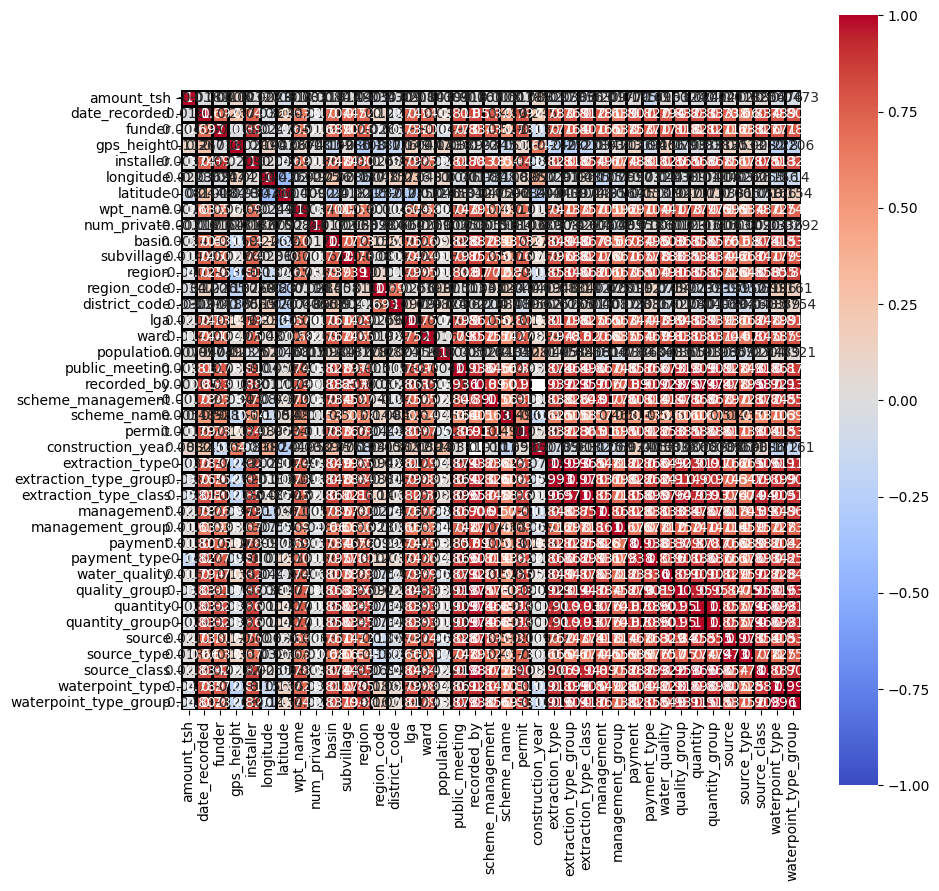

In [ ]:
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(X.corr(),fmt = '.3g',square=True, annot = True, vmin=-1, vmax=1, center= 0, cmap= 'coolwarm', linewidths=1, linecolor='black')

## Lets delete features with correlation more then 0.8

In [ ]:
to_del_features = ["extraction_type_group", "extraction_type_class", "quantity_group", "source_type", \
                   "waterpoint_type_group"]

X.drop(columns= to_del_features, axis=1, inplace=True)

<Axes: >

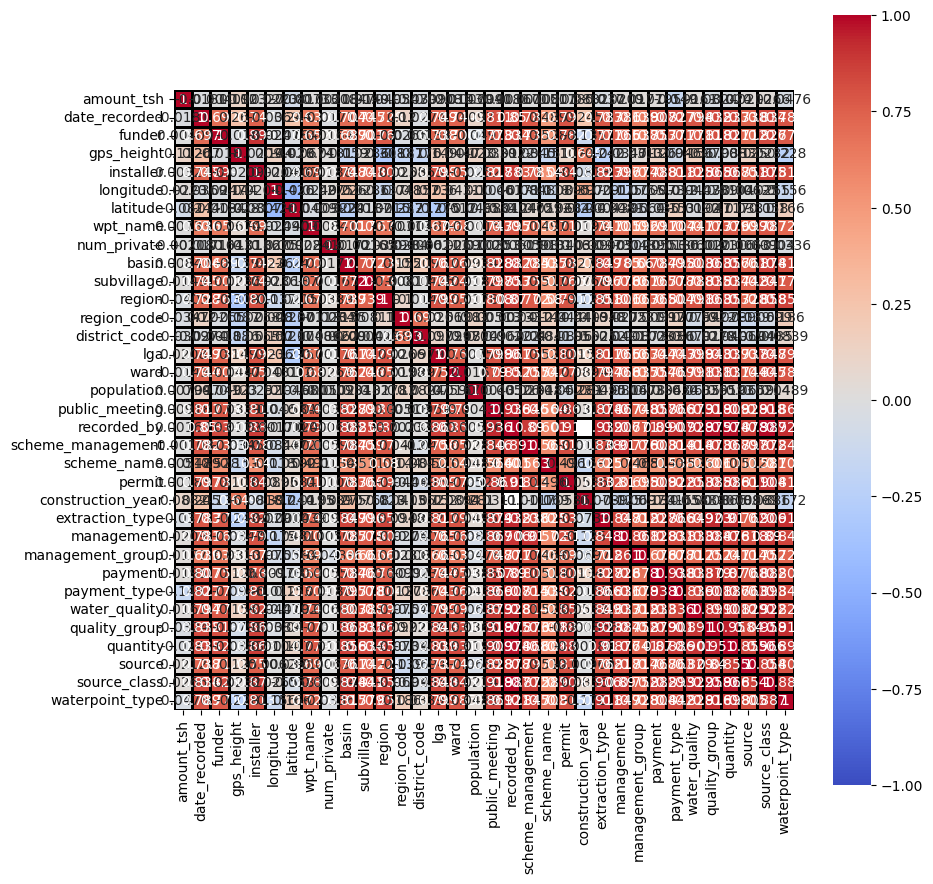

In [ ]:
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(X.corr(),fmt = '.3g',square=True, annot = True, vmin=-1, vmax=1, center= 0, cmap= 'coolwarm', linewidths=1, linecolor='black')

Now we don't have useless columns.

In [ ]:

# Use sklearn.model_selection.train_test_split with test_size=0.33 and random_state=42
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [ ]:
#Normalization of NUMERICAL data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

X_train[list(num_columns)] = scaler.fit_transform(X_train[list(num_columns)])
X_test[list(num_columns)] = scaler.fit_transform(X_test[list(num_columns)])

In [ ]:
X_train.head(5)

amount_tsh  date_recorded  funder  gps_height  installer  longitude  \
id                                                                           
36223         NaN            307     663         NaN        703        NaN   
36628         NaN            307     663         NaN        703        NaN   
41856         NaN            307     663         NaN        703        NaN   
51877         NaN            307     663         NaN        703        NaN   
5032          NaN            307     663         NaN        703        NaN   

       latitude  wpt_name  num_private  basin  ...  management  \
id                                             ...               
36223       NaN      4748          NaN      9  ...          12   
36628       NaN      4748          NaN      9  ...          12   
41856       NaN      4748          NaN      9  ...          12   
51877       NaN      4748          NaN      9  ...          12   
5032        NaN      4748          NaN      9  ...          12   

       management_group  payment  payment_type  water_quality  quality_group  \
id                                                                             
36223                 5        7             7              7              6   
36628                 5        7             7              7              6   
41856                 5        7             7              7              6   
51877                 5        7             7              7              6   
5032                  5        7             7              7              6   

       quantity  source  source_class  waterpoint_type  
id                                                      
36223         5      10             3                7  
36628         5      10             3                7  
41856         5      10             3                7  
51877         5      10             3                7  
5032          5      10             3                7  

[5 rows x 34 columns]

**Preparing X (features value)**

**Preparing Y (target value)**

Check if data balanced or not

In [ ]:
y.head()

id
0    2
1    0
2    0
3    0
4    2
Name: status_group, dtype: int64

In [ ]:
y.value_counts()/len(y)

0    0.543090
2    0.384232
1    0.072678
Name: status_group, dtype: float64

Here we can see 3 classes. There is great disbalance.

In [ ]:
import pandas as pd
from scipy.cluster import hierarchy
import matplotlib.pyplot as plt

In [ ]:
X.head()

amount_tsh  date_recorded  funder  gps_height  installer  longitude  \
id                                                                        
0          NaN            307     663         NaN        703        NaN   
1          NaN            307     663         NaN        703        NaN   
2          NaN            307     663         NaN        703        NaN   
3          NaN            307     663         NaN        703        NaN   
4          0.0             45      81         0.0         71  36.164893   

    latitude  wpt_name  num_private  basin  ...  management  management_group  \
id                                          ...                                 
0        NaN      4748          NaN      9  ...          12                 5   
1        NaN      4748          NaN      9  ...          12                 5   
2        NaN      4748          NaN      9  ...          12                 5   
3        NaN      4748          NaN      9  ...          12                 5   
4  -6.099289       338          0.0      8  ...           7                 4   

    payment  payment_type  water_quality  quality_group  quantity  source  \
id                                                                          
0         7             7              7              6         5      10   
1         7             7              7              6         5      10   
2         7             7              7              6         5      10   
3         7             7              7              6         5      10   
4         6             6              5              2         0       7   

    source_class  waterpoint_type  
id                                 
0              3                7  
1              3                7  
2              3                7  
3              3                7  
4              0                4  

[5 rows x 34 columns]

In [ ]:
subset_df = X.iloc[:100]

plt.figure(figsize=(10, 7))
dendrogram = hierarchy.dendrogram(hierarchy.linkage(subset_df, method='ward'))
plt.title('Dendrogram')
plt.xlabel('Data points')
plt.ylabel('Euclidean distance')
plt.show()

ValueError: ignored

<Figure size 1000x700 with 0 Axes>

##4. Learning different models

Lets try RandomForestClassifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier
SEED = 42
params = [
    {
        'n_estimators': np.arange(10, 200, 20),
        'max_depth': np.arange(2, 25, 1),
    }
]
model = RandomForestClassifier(random_state=SEED)


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, roc_curve, roc_auc_score

In [ ]:
%%time
log_reg = GridSearchCV(model, params, scoring='r2' ,cv=5, n_jobs = -1, verbose=25)
log_reg.fit(X_train, y_train)

In [ ]:
print(log_reg.best_estimator_)
print('best parametrs: ', log_reg.best_params_)
predicted_test = log_reg.best_estimator_.predict(X_test)
accuracy_test = accuracy_score(predicted_test, y_test)
print('Accuracy is:', round(accuracy_test,3) )
print('F1_Score is:', round(f1_score(y_test, predicted_test, average='weighted'),3))
model = log_reg.best_estimator_

Here we can see, that F1 = 0.76

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, roc_curve, roc_auc_score

log_reg = GridSearchCV(model, params, scoring='r2' ,cv=5, n_jobs = -1, verbose=False)
log_reg.fit(X_train, y_train)
print(log_reg.best_estimator_)
print('best parametrs: ', log_reg.best_params_)
predicted_test = log_reg.best_estimator_.predict(X_test)
accuracy_test = accuracy_score(predicted_test, y_test)
print('Accuracy is:', round(accuracy_test,3) )
print('F1_Score is:', round(f1_score(y_test, predicted_test),3))
model = log_reg.best_estimator_

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score

model = LogisticRegression()

params = {'C': [0.1, 1, 10, 100], 'penalty': ['l1', 'l2']}

log_reg = GridSearchCV(model, params, scoring='r2', cv=5, n_jobs=-1, verbose=False)

log_reg.fit(X_train, y_train)

print(log_reg.best_estimator_)
print('best parameters:', log_reg.best_params_)

predicted_test = log_reg.best_estimator_.predict(X_test)

accuracy_test = accuracy_score(y_test, predicted_test)
f1 = f1_score(y_test, predicted_test, average='weighted')

print('Accuracy is:', round(accuracy_test, 3))
print('F1_Score is:', round(f1, 3))
model = log_reg.best_estimator_

In [ ]:
#!pip install hyperopt

In [ ]:
import xgboost as xgb #tree-based model
from sklearn.metrics import accuracy_score, mean_squared_error, f1_score
from hyperopt import STATUS_OK, Trials, fmin, hp, tpe

In [ ]:
xgb_model = xgb.XGBClassifier()

## Find the best hyperparameters

In [ ]:
space = {'objective': "multi:softprob",
         'num_classes':3,
         'max_depth': hp.quniform("max_depth", 3, 18, 1),
         'gamma': hp.uniform ('gamma', 1,9),
         'reg_alpha' : hp.quniform('reg_alpha', 40,180,1),
         'reg_lambda' : hp.uniform('reg_lambda', 0,1),
         'colsample_bytree' : hp.uniform('colsample_bytree', 0.5,1),
         'min_child_weight' : hp.quniform('min_child_weight', 0, 10, 1),
         'n_estimators': 180,
         'seed': 0
        }

In [ ]:
def objective(space):

    clf=xgb.XGBClassifier(objective=space['objective'], num_classes=int(space['num_classes']),
        n_estimators=space['n_estimators'], max_depth = int(space['max_depth']), \
        gamma=space['gamma'],reg_alpha = int(space['reg_alpha']),
        min_child_weight=int(space['min_child_weight']), colsample_bytree=int(space['colsample_bytree']))

    evaluation = [(X_train, y_train), (X_test, y_test)]

    clf.fit(X_train, y_train,
            eval_set=evaluation, eval_metric="auc",
            early_stopping_rounds=10,verbose=False)


    pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, pred>0.5)
    # print ("SCORE:", accuracy, "RMSE:", mean_squared_error(pred, y_test, squared=False), end='\n\n')
    return {'loss': -accuracy, 'status': STATUS_OK }

In [ ]:
trials = Trials()
best_hyperparams = fmin(fn = objective,
                        space = space,
                        algo = tpe.suggest,
                        max_evals = 100,
                        trials = trials)

In [ ]:
print("The best hyperparameters are :", best_hyperparams)

## Test and thrain with best hyperparameters

In [ ]:
space = {'objective': "multi:softmax",
         'num_classes':3,
         'max_depth': 8,
         'gamma': 8.095966646634324,
         'reg_alpha' : 173,
         'reg_lambda' : 0.07151147680924227,
         'colsample_bytree' : 0.8477558472920539,
         'min_child_weight' : 0,
         'n_estimators': 180,
         'seed': 0
        }

In [ ]:
clf=xgb.XGBClassifier(objective=space['objective'], num_classes=int(space['num_classes']),
        n_estimators=space['n_estimators'], max_depth = int(space['max_depth']), \
        gamma=space['gamma'],reg_alpha = int(space['reg_alpha']),
        min_child_weight=int(space['min_child_weight']), colsample_bytree=int(space['colsample_bytree']))

evaluation = [(X_train, y_train), (X_test, y_test)]

clf.fit(X_train, y_train,
        eval_set=evaluation, eval_metric="auc",
        early_stopping_rounds=10,verbose=False)

pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, pred>0.5)
print ("SCORE:", accuracy, "RMSE:", mean_squared_error(pred, y_test, squared=False), end='\n\n')
print("F1_Score is:", f1_score(y_test, pred, average='weighted'))

## CatBoost

In [ ]:
!pip install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 2.2 MB/s eta 0:00:00


In [ ]:
!pip install optune

ERROR: Could not find a version that satisfies the requirement optune (from versions: none)
ERROR: No matching distribution found for optune


In [ ]:
import catboost as cb
from sklearn.metrics import mean_squared_error
import optuna

ModuleNotFoundError: ignored

In [ ]:
def objective(trial):

    parametrs = {
        "iterations": 1000,
        "learning_rate": trial.suggest_float("learning_rate", 1e-3, 0.1, log=True),
        "depth": trial.suggest_int("depth", 1, 10),
        "subsample": trial.suggest_float("subsample", 0.05, 1.0),
        "colsample_bylevel": trial.suggest_float("colsample_bylevel", 0.05, 1.0),
        "min_data_in_leaf": trial.suggest_int("min_data_in_leaf", 1, 100),
    }

    model = cb.CatBoostRegressor(**parametrs, silent=True)
    model.fit(X_test, y_test)
    pred = model.predict(X_train)
    rmse = mean_squared_error(y_test, pred, squared=False)
    f1 = f1_score(y_test, pred, average='weighted')

    return rmse, f1

[I 2023-10-26 08:06:59,710] A new study created in memory with name: no-name-97e75abb-f6dc-4c02-a879-79e6ea00401b
[W 2023-10-26 08:07:37,003] Trial 0 failed with parameters: {'learning_rate': 0.004244992963284808, 'depth': 5, 'min_data_in_leaf': 10} because of the following error: The number of the values 2 did not match the number of the objectives 1.
[W 2023-10-26 08:07:37,004] Trial 0 failed with value (0.9538184442405058, 0.6814868401174629).
[W 2023-10-26 08:09:15,731] Trial 1 failed with parameters: {'learning_rate': 0.005828251572619781, 'depth': 10, 'min_data_in_leaf': 56} because of the following error: The number of the values 2 did not match the number of the objectives 1.
[W 2023-10-26 08:09:15,732] Trial 1 failed with value (0.8971180630845798, 0.716750556694773).
[W 2023-10-26 08:09:45,189] Trial 2 failed with parameters: {'learning_rate': 0.014058798680537494, 'depth': 4, 'min_data_in_leaf': 18} because of the following error: The number of the values 2 did not match the

In [ ]:
import catboost as cb
from sklearn.metrics import mean_squared_error
import optuna

from catboost import Pool, CatBoostClassifier

def objective(trial):

    param = {
        "iterations": 1000,
        "learning_rate": trial.suggest_float("learning_rate", 1e-3, 0.1, log=True),
        "depth": trial.suggest_int("depth", 1, 10),
        "min_data_in_leaf": trial.suggest_int("min_data_in_leaf", 1, 100),
        "loss_function":'MultiClass'

    }

    train_dataset = Pool(data=X_train,
                      label=y_train,
                         )

    test_dataset = Pool(data=X_test,
                      label=y_test,
                     )

    model = cb.CatBoostClassifier(**param, silent=True)
    model.fit(train_dataset)
    pred = model.predict(test_dataset)

    # # Get predicted probabilities for each class
    # preds_proba = model.predict_proba(test_dataset)
    # # Get predicted RawFormulaVal
    # preds_raw = model.predict(test_dataset,
    #                           prediction_type='RawFormulaVal')


    rmse = mean_squared_error(y_test, pred, squared=False)
    f1 = f1_score(y_test, pred, average='weighted')

    # return rmse, f1
    return rmse, f1

study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=30)

print('Best hyperparameters:', study.best_params)
print('Best RMSE:', study.best_value[0])
print('Best f1:', study.best_value[1])

In [ ]:
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=30)

NameError: ignored

In [ ]:
print('Best hyperparameters:', study.best_params)
print('Best RMSE:', study.best_value[0])
print('Best f1:', study.best_value[1])
